In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [26]:
# Hyperparameters
batch_size = 64
z_dim = 100  # Latent space dimension (noise)
lr = 0.0002  # Learning rate
epochs = 50
sample_interval = 5  # Interval to sample and save images

In [27]:
# Create a simple Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(z_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 28 * 28)
        self.tanh = nn.Tanh()  # Normalize output to (-1, 1)

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return self.tanh(x).view(-1, 1, 28, 28)  # Reshape into image format (1x28x28)

# Create a simple Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, img):
        x = img.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)

In [28]:
# Initialize the generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [29]:
# Loss function and optimizers
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Prepare the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
train_loader = DataLoader(datasets.MNIST('.', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)

In [30]:
# Function to save generated images
def save_generated_images(epoch, generator, device):
    # Create random noise to generate fake images, move to GPU
    z = torch.randn(64, z_dim, device=device)
    gen_imgs = generator(z)

    # Create a grid of images
    grid_img = make_grid(gen_imgs, nrow=8, normalize=True)

    # Convert to numpy for plotting, move to CPU for visualization
    grid_img = grid_img.cpu().detach().numpy()  # Move tensor to CPU and convert to numpy

    # Transpose dimensions for proper image orientation (C, H, W -> H, W, C)
    grid_img = np.transpose(grid_img, (1, 2, 0))

    # Plot the images
    plt.figure(figsize=(8, 8))
    plt.imshow(grid_img)
    plt.axis('off')
    plt.show()

Epoch [0/50] Batch 0/938                   | D Loss: 1.3661 | G Loss: 0.7097
Epoch [0/50] Batch 100/938                   | D Loss: 1.0222 | G Loss: 1.2931
Epoch [0/50] Batch 200/938                   | D Loss: 0.0247 | G Loss: 3.9189
Epoch [0/50] Batch 300/938                   | D Loss: 0.9171 | G Loss: 1.6735
Epoch [0/50] Batch 400/938                   | D Loss: 0.2907 | G Loss: 3.3050
Epoch [0/50] Batch 500/938                   | D Loss: 0.7716 | G Loss: 1.7469
Epoch [0/50] Batch 600/938                   | D Loss: 0.2416 | G Loss: 2.9251
Epoch [0/50] Batch 700/938                   | D Loss: 0.3932 | G Loss: 2.3341
Epoch [0/50] Batch 800/938                   | D Loss: 1.0212 | G Loss: 2.5769
Epoch [0/50] Batch 900/938                   | D Loss: 0.5882 | G Loss: 2.4782


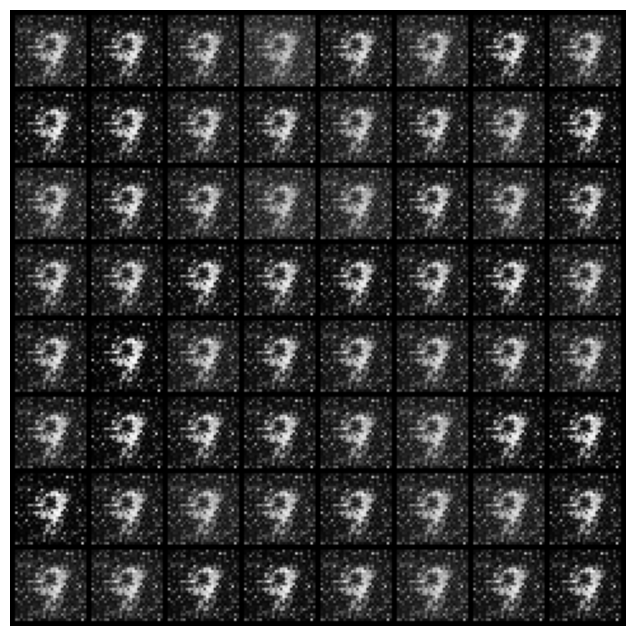

Epoch [1/50] Batch 0/938                   | D Loss: 1.3019 | G Loss: 6.3316
Epoch [1/50] Batch 100/938                   | D Loss: 0.1051 | G Loss: 2.8777
Epoch [1/50] Batch 200/938                   | D Loss: 0.2716 | G Loss: 3.6956
Epoch [1/50] Batch 300/938                   | D Loss: 0.1783 | G Loss: 3.1612
Epoch [1/50] Batch 400/938                   | D Loss: 0.2221 | G Loss: 4.9849
Epoch [1/50] Batch 500/938                   | D Loss: 0.0019 | G Loss: 12.3853
Epoch [1/50] Batch 600/938                   | D Loss: 0.2952 | G Loss: 4.1764
Epoch [1/50] Batch 700/938                   | D Loss: 0.0022 | G Loss: 16.7134
Epoch [1/50] Batch 800/938                   | D Loss: 0.5713 | G Loss: 8.7104
Epoch [1/50] Batch 900/938                   | D Loss: 0.2043 | G Loss: 5.8375
Epoch [2/50] Batch 0/938                   | D Loss: 0.3146 | G Loss: 4.0576
Epoch [2/50] Batch 100/938                   | D Loss: 0.1400 | G Loss: 3.7139
Epoch [2/50] Batch 200/938                   | D Loss:

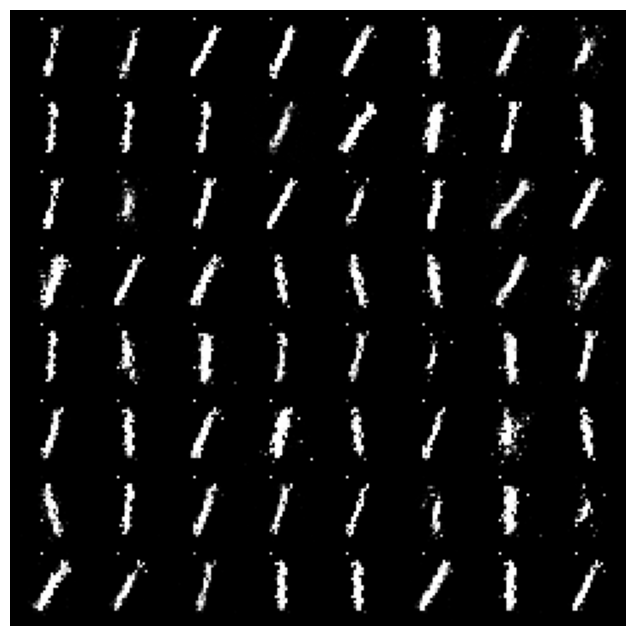

Epoch [6/50] Batch 0/938                   | D Loss: 0.5355 | G Loss: 2.3101
Epoch [6/50] Batch 100/938                   | D Loss: 0.4075 | G Loss: 2.2358
Epoch [6/50] Batch 200/938                   | D Loss: 0.4034 | G Loss: 2.2015
Epoch [6/50] Batch 300/938                   | D Loss: 0.5194 | G Loss: 2.4889
Epoch [6/50] Batch 400/938                   | D Loss: 0.3867 | G Loss: 3.4690
Epoch [6/50] Batch 500/938                   | D Loss: 0.3972 | G Loss: 2.9615
Epoch [6/50] Batch 600/938                   | D Loss: 0.3884 | G Loss: 2.0402
Epoch [6/50] Batch 700/938                   | D Loss: 0.7274 | G Loss: 2.8822
Epoch [6/50] Batch 800/938                   | D Loss: 0.3422 | G Loss: 2.3741
Epoch [6/50] Batch 900/938                   | D Loss: 0.4995 | G Loss: 2.9086
Epoch [7/50] Batch 0/938                   | D Loss: 0.4519 | G Loss: 2.0664
Epoch [7/50] Batch 100/938                   | D Loss: 0.4612 | G Loss: 2.9002
Epoch [7/50] Batch 200/938                   | D Loss: 0

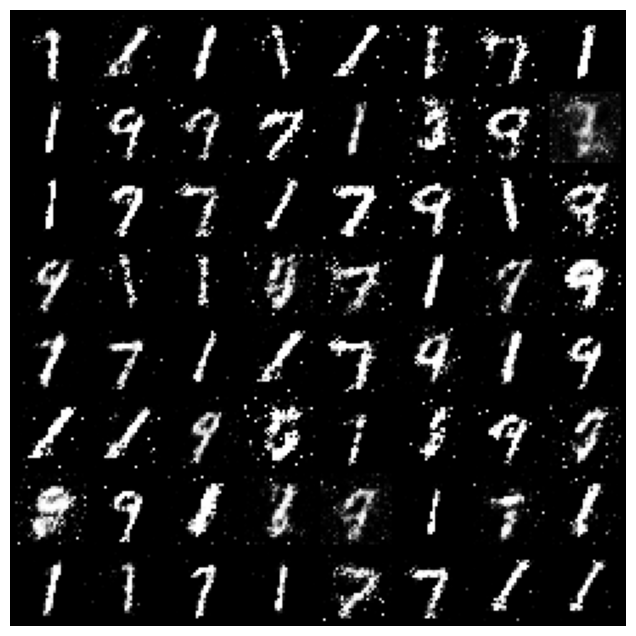

Epoch [11/50] Batch 0/938                   | D Loss: 0.6137 | G Loss: 2.1128
Epoch [11/50] Batch 100/938                   | D Loss: 0.5093 | G Loss: 2.0056
Epoch [11/50] Batch 200/938                   | D Loss: 0.6777 | G Loss: 2.1268
Epoch [11/50] Batch 300/938                   | D Loss: 0.7495 | G Loss: 1.5920
Epoch [11/50] Batch 400/938                   | D Loss: 0.6931 | G Loss: 1.8893
Epoch [11/50] Batch 500/938                   | D Loss: 0.6206 | G Loss: 1.8356
Epoch [11/50] Batch 600/938                   | D Loss: 0.7304 | G Loss: 1.8097
Epoch [11/50] Batch 700/938                   | D Loss: 0.5936 | G Loss: 2.2488
Epoch [11/50] Batch 800/938                   | D Loss: 0.6714 | G Loss: 2.2766
Epoch [11/50] Batch 900/938                   | D Loss: 0.7758 | G Loss: 1.8269
Epoch [12/50] Batch 0/938                   | D Loss: 0.7340 | G Loss: 1.5612
Epoch [12/50] Batch 100/938                   | D Loss: 0.6521 | G Loss: 1.8435
Epoch [12/50] Batch 200/938                 

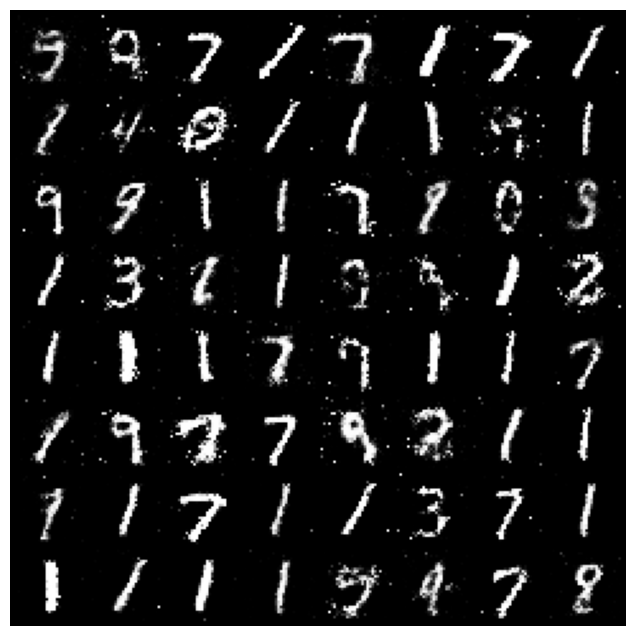

Epoch [16/50] Batch 0/938                   | D Loss: 0.6635 | G Loss: 2.1828
Epoch [16/50] Batch 100/938                   | D Loss: 0.7157 | G Loss: 1.6418
Epoch [16/50] Batch 200/938                   | D Loss: 0.8538 | G Loss: 1.6251
Epoch [16/50] Batch 300/938                   | D Loss: 0.7254 | G Loss: 1.9172
Epoch [16/50] Batch 400/938                   | D Loss: 0.7032 | G Loss: 2.0715
Epoch [16/50] Batch 500/938                   | D Loss: 0.8097 | G Loss: 1.6512
Epoch [16/50] Batch 600/938                   | D Loss: 0.8076 | G Loss: 1.8206
Epoch [16/50] Batch 700/938                   | D Loss: 0.7521 | G Loss: 1.8887
Epoch [16/50] Batch 800/938                   | D Loss: 0.8525 | G Loss: 1.6477
Epoch [16/50] Batch 900/938                   | D Loss: 0.7767 | G Loss: 1.7120
Epoch [17/50] Batch 0/938                   | D Loss: 0.7127 | G Loss: 1.9433
Epoch [17/50] Batch 100/938                   | D Loss: 0.6649 | G Loss: 1.6909
Epoch [17/50] Batch 200/938                 

In [ ]:
# Training the GAN
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        # Real images
        real_imgs = imgs.to(device)  # Move real images to GPU

        # Generate fake images with the same batch size as real images
        z = torch.randn(real_imgs.size(0), z_dim, device=device)  # Use real_imgs.size(0) for batch size
        fake_imgs = generator(z)

        # Labels for real and fake images
        real_labels = torch.ones(real_imgs.size(0), 1, device=device)  # Move labels to GPU
        fake_labels = torch.zeros(real_imgs.size(0), 1, device=device)

        # Train Discriminator
        optimizer_d.zero_grad()

        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()

        g_loss = criterion(discriminator(fake_imgs), real_labels)  # Generator wants to fool the discriminator
        g_loss.backward()
        optimizer_g.step()

        # Print loss and save images at intervals
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {i}/{len(train_loader)} \
                  | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Save generated images every sample_interval
    if epoch % sample_interval == 0:
        save_generated_images(epoch, generator, device)

print("Training finished!")